In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

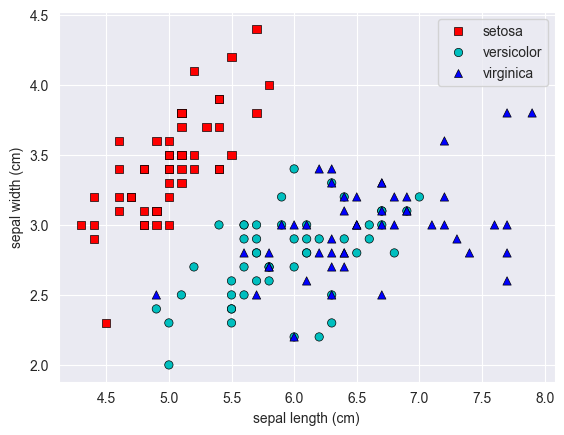

In [3]:
# Plot the data set
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], style=iris.target_names[y], 
                palette=['r','c','b'], markers=('s','o','^'), edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.savefig('figures/iris.pdf')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [6]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 0.9554
Test accuracy: 0.7895


In [7]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': np.arange(3, 11),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'max_features': ['sqrt', 'log2', None]    
}
search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), params, 
                            n_iter=50, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

print(search.best_params_)

{'subsample': np.float64(0.6), 'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': np.int64(3)}


In [8]:
best_clf = search.best_estimator_
print(f'Train accuracy: {best_clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {best_clf.score(X_test, y_test):.4f}')

Train accuracy: 0.8125
Test accuracy: 0.8684


In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, class_names, 
                             colors=['r', 'c', 'b'], markers=('s', 'o', '^')):  
    cmap = ListedColormap(colors)
      
    # Create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # Find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # Put the result into a color plot  
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the points from the dataset
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

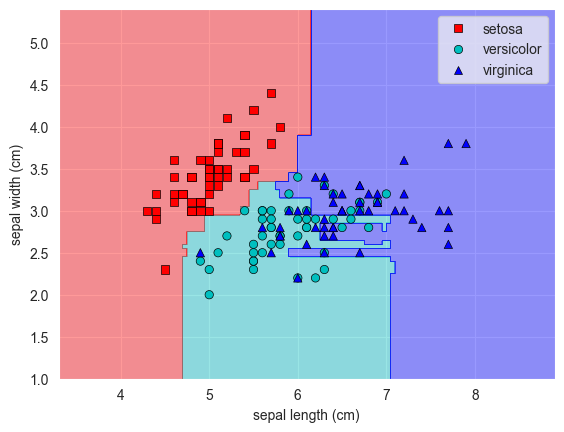

In [10]:
plot_decision_boundaries(best_clf, X, y, iris.feature_names, iris.target_names)
plt.savefig('figures/iris_gbdt_boundaries.pdf')